# EDA Of Accidents in NYC

## Project Overview: Analyzing Traffic Accidents in New York City
Data Source: https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95/about_data
#### Objective: 

Examine patterns and trends in traffic accidents in New York City to identify high-risk areas and times for accidents.

#### Data Source:

NYC Open Data for Traffic Accidents: This dataset includes the location, time, and conditions of each traffic accident.

#### Visualization Techniques:
Map Visualization

1. Choropleth Map: Visualize the density of accidents by district or borough to identify areas with higher accident rates.
2. Bubble Map: Display the severity of accidents (like injuries and fatalities) using bubbles of different sizes at the accident locations.

#### Aggregation Visualization

1. Histogram/Density Plot: Show the distribution of accidents over time (e.g., by hour of the day or day of the week) to reveal when accidents are most likely to occur.
2. Box Plot: Compare the frequency and severity of accidents across different boroughs to identify which areas need more attention in terms of road safety measures.

#### Interactive Visualization

  Interactive Dashboard: Combine map visualizations and aggregation plots into a single interactive dashboard. Allow users to filter data by date, time of day, and accident severity.
  
#### GOAL
Summarize key insights, such as the most dangerous times and locations for traffic accidents in New York City, and suggest potential interventions or areas for further research.

In [55]:
import numpy as np
import pandas as pd
import json
pd.options.display.max_rows = 10

import matplotlib.pyplot as plt
import seaborn as sns


import folium

In [56]:
data = pd.read_csv('Motor_Vehicle_Collisions.csv')

In [57]:
data.head()

,CRASH DATE,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,FULL STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,6/25/2019,13:15,10470.0,40.904106,-73.846054,"(40.904106, -73.846054)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4162246,Sedan
1,8/22/2022,8:00,10470.0,40.903786,-73.846080,"(40.903786, -73.84608)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4557719,Station Wagon/Sport Utility Vehicle
2,5/27/2021,15:37,10466.0,40.903160,-73.845990,"(40.90316, -73.84599)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4422922,Sedan
3,1/2/2022,14:00,10466.0,40.901836,-73.845480,"(40.901836, -73.84548)",WILDER AVENUE,0,0,0,0,0,0,0,0,Other Vehicular,4494954,Sedan
4,5/5/2022,20:30,10466.0,40.901836,-73.845480,"(40.901836, -73.84548)",WILDER AVENUE,0,0,0,0,0,0,0,0,Traffic Control Disregarded,4526930,Station Wagon/Sport Utility Vehicle


# Data Cleaning
Cleaning up missing values and changing CRASH DATE to a date format.

In [58]:
missing_values = data.isnull().sum()
missing_values

CRASH DATE                         0
CRASH TIME                         0
ZIP CODE                         165
LATITUDE                           0
LONGITUDE                          0
                                ... 
NUMBER OF MOTORIST INJURED         0
NUMBER OF MOTORIST KILLED          0
CONTRIBUTING FACTOR VEHICLE 1      4
COLLISION_ID                       0
VEHICLE TYPE CODE 1               15
Length: 18, dtype: int64

In [59]:
data['ZIP CODE'].fillna(data['ZIP CODE'].mode()[0], inplace=True)  # Filling with the mode
data['CONTRIBUTING FACTOR VEHICLE 1'].fillna('Unspecified', inplace=True)
data['VEHICLE TYPE CODE 1'].fillna('Unknown', inplace=True)

In [60]:
data['CRASH DATE'] = pd.to_datetime(data['CRASH DATE'])

In [62]:
data.head()

,CRASH DATE,CRASH TIME,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,FULL STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-06-25,13:15,10470.0,40.904106,-73.846054,"(40.904106, -73.846054)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4162246,Sedan
1,2022-08-22,8:00,10470.0,40.903786,-73.846080,"(40.903786, -73.84608)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4557719,Station Wagon/Sport Utility Vehicle
2,2021-05-27,15:37,10466.0,40.903160,-73.845990,"(40.90316, -73.84599)",WILDER AVENUE,0,0,0,0,0,0,0,0,Unspecified,4422922,Sedan
3,2022-01-02,14:00,10466.0,40.901836,-73.845480,"(40.901836, -73.84548)",WILDER AVENUE,0,0,0,0,0,0,0,0,Other Vehicular,4494954,Sedan
4,2022-05-05,20:30,10466.0,40.901836,-73.845480,"(40.901836, -73.84548)",WILDER AVENUE,0,0,0,0,0,0,0,0,Traffic Control Disregarded,4526930,Station Wagon/Sport Utility Vehicle


#### Visualization Implementation

We'll focus on:

1. Map Visualization: We'll plot the collision locations on a map to visually inspect where most incidents occur.
2. Aggregation Visualization: histograms to understand the distribution of incidents over time and box plots to explore the distribution of persons injured in the collisions.
3. Interactive Visualization: an interactive map using Folium, allowing us to explore different areas and see detailed information about the collisions.

In [92]:
m = folium.Map(location=[data['LATITUDE'].mean(), data['LONGITUDE'].mean()], zoom_start=14)

for idx, row in data.iterrows():
    folium.CircleMarker(
        location=(row['LATITUDE'], row['LONGITUDE']),
        radius=3,
        popup=f"{row['FULL STREET NAME']}, Injuries: {row['NUMBER OF PERSONS INJURED']}",
        color='blue',
        fill=True,
        fill_color='blue'
    ).add_to(m)

m

In [97]:
#HeatMap
from folium.plugins import HeatMap

center_lat = data['LATITUDE'].mean()
center_lon = data['LONGITUDE'].mean()

map = folium.Map(location=[center_lat, center_lon], zoom_start=14)
HeatMap(data[['LATITUDE', 'LONGITUDE']].dropna(), radius=15).add_to(map)
map


In [95]:
from folium.plugins import HeatMap

center_lat = data['LATITUDE'].mean()
center_lon = data['LONGITUDE'].mean()

map = folium.Map(location=[center_lat, center_lon], zoom_start=14)
# Add a heat map to visualize collision density
HeatMap(data[['LATITUDE', 'LONGITUDE']].dropna()).add_to(map)
map

Suggested Interventions:

Based on the findings from the temporal and spatial analyses, here are potential interventions:

1. Enhanced Street Lighting and Signage: In areas and times identified with high collision rates, improving street lighting and clearer signage can help reduce accidents, especially during evening or early morning hours when visibility might be poor.
2. Traffic Flow Improvements: In high-collision areas, reevaluating traffic light timing, adding roundabouts, or redesigning intersections might reduce bottlenecks and collision points.
3. Public Awareness Campaigns: Focused on times and locations of high risk, these campaigns could educate drivers about potential dangers and encourage safer driving practices.
4. Increased Enforcement: Targeting enforcement efforts (like speed traps or DUI checkpoints) during peak times for accidents could deter risky behavior.

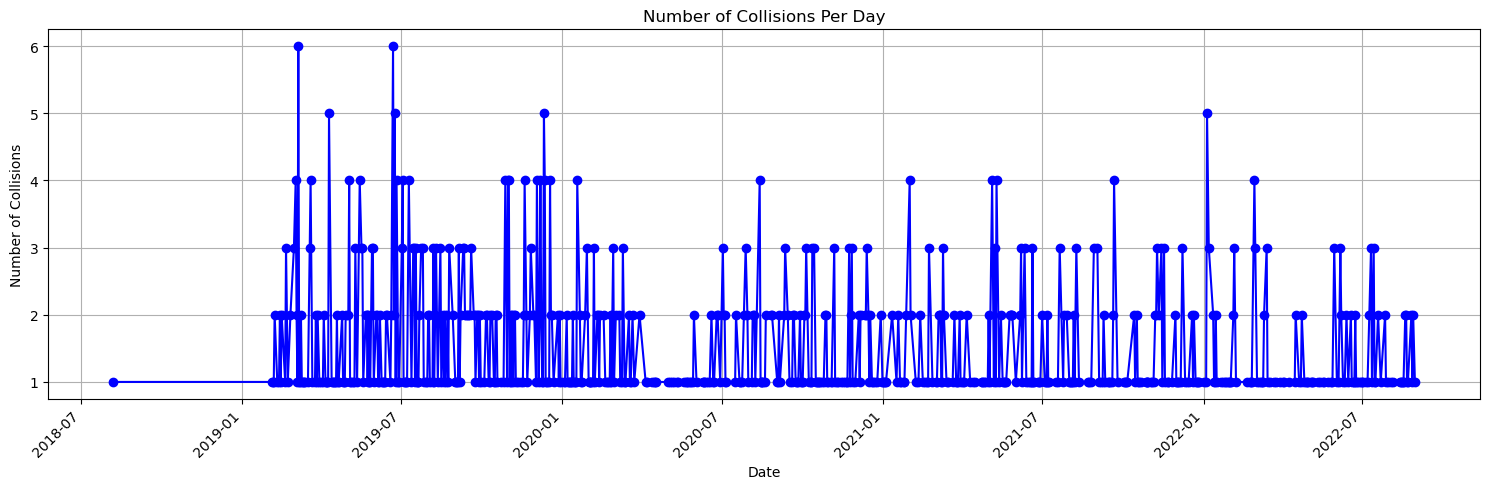

In [84]:
#LineGraph
import matplotlib.pyplot as plt

daily_collisions = data['CRASH DATE'].value_counts().sort_index()

plt.figure(figsize=(15, 5))
daily_collisions.plot(kind='line', color='blue', marker='o', linestyle='-')
plt.title('Number of Collisions Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=45)  # Rotate date labels
plt.grid(True)  # Adding grid
plt.tight_layout()  # Adjust layout for label rotation
plt.show()


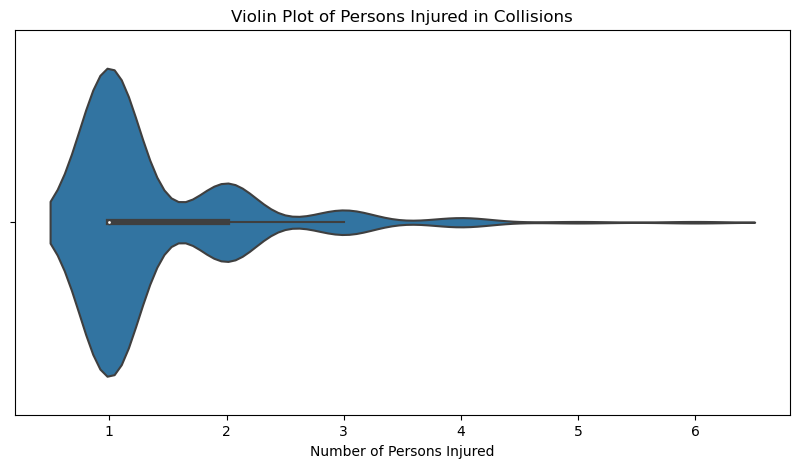

In [86]:
plt.figure(figsize=(10, 5))
sns.violinplot(x=data['NUMBER OF PERSONS INJURED'])
plt.title('Violin Plot of Persons Injured in Collisions')
plt.xlabel('Number of Persons Injured')
plt.show()


In [78]:
from folium.plugins import MarkerCluster
nyc_center = [40.7128, -74.0060]  # Coordinates for NYC center
map = folium.Map(location=nyc_center, zoom_start=10)

# Create a Marker Cluster
marker_cluster = MarkerCluster().add_to(map)

# Add each collision data point to the cluster
for index, row in data.iterrows():
    folium.Marker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        popup=f"{row['FULL STREET NAME']}: Injuries {row['NUMBER OF PERSONS INJURED']}",
        icon=folium.Icon(color='red' if row['NUMBER OF PERSONS INJURED'] > 0 else 'blue', icon='info-sign')
    ).add_to(marker_cluster)

# Display the map
map